# Decision Tree Project

## Step 1: Loading the dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=421&path=diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Look at data in set

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

## Step 2: Perform a full EDA

## Start Analyzing Data to see what we keep in our include_list

<Axes: xlabel='Glucose', ylabel='Probability'>

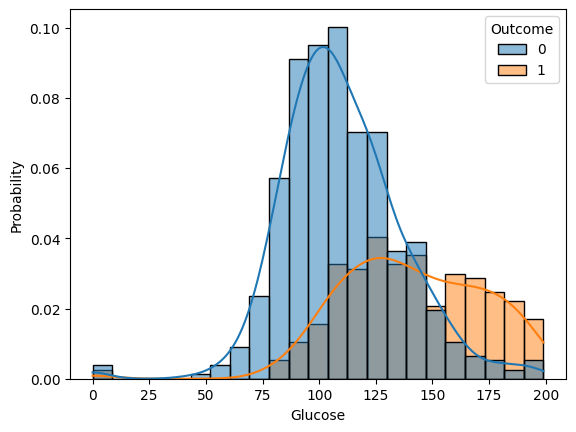

In [10]:
# the higher the glucose the more likely one is to have diabetes - KEEP GLUCOSE
sns.histplot(data=df, x='Glucose', hue='Outcome', stat='probability', kde=True)

<Axes: xlabel='BloodPressure', ylabel='Probability'>

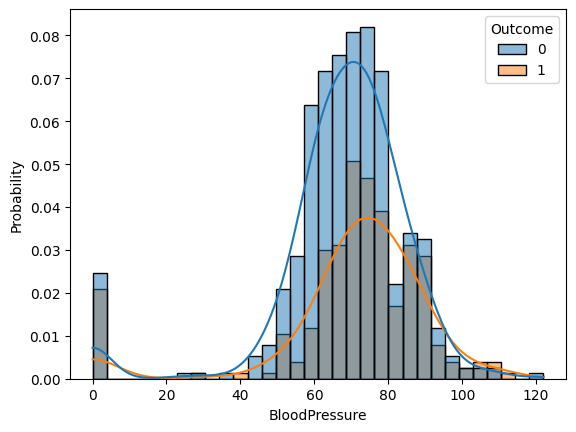

In [11]:
# 
sns.histplot(data=df, x='BloodPressure', hue='Outcome', stat='probability', kde=True)

<Axes: xlabel='Insulin', ylabel='Probability'>

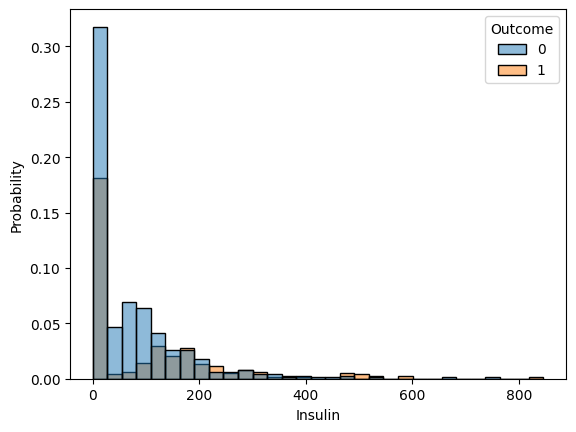

In [12]:
# 0 is missing data, but dont see anything standing out here that shows consistancy for diabetes
sns.histplot(data=df, x='Insulin', hue='Outcome', stat='probability')

<Axes: >

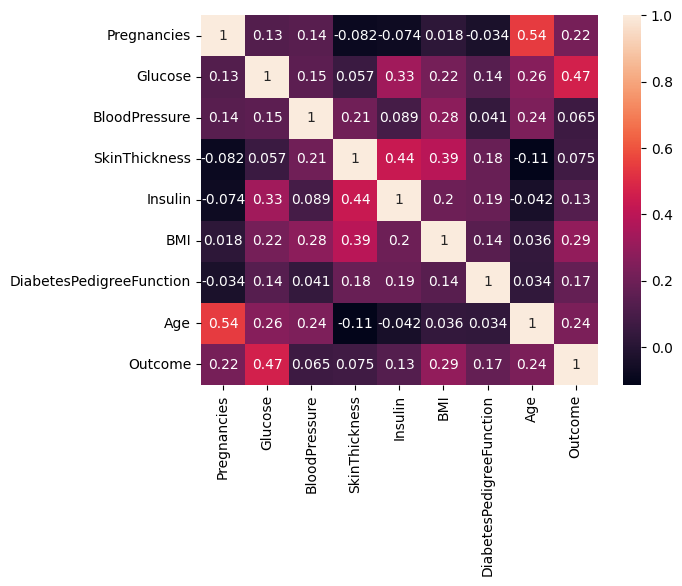

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [15]:
include_list = ['Glucose', 'BMI', 'Age', 'Pregnancies']  #

In [16]:
X = df[include_list]
y = df['Outcome']

## Start train and test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train.shape

(537, 4)

In [20]:
y_train.shape

(537,)

In [21]:
X_test.shape

(231, 4)

In [22]:
y_test.shape

(231,)

## Step 3: Build a decision Tree

Here we went with the DecisionTreeClassifier because diabetes outcome is a classification 0 or 1

In [23]:
from sklearn.tree import DecisionTreeClassifier

Baseline model before comparing impurity functions (gini, entropy, log_loss)

In [24]:
# criterion default is , unless we chose otherwise
dt_model = DecisionTreeClassifier(max_depth = 5)   # create the model object
dt_model.fit(X_train, y_train)        # now we fit it

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Here we are evaluating the accuracy, precision, recall, classification report of the baseline model

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

In [26]:
def model_evaluator(X_matrix, y_target, model):
    preds = model.predict(X_matrix)
    
    print(f"Accuracy score: {accuracy_score(y_true = y_target, y_pred = preds)}")
    print(f"Precision score: {precision_score(y_true = y_target, y_pred = preds)}")
    print(f"Recall score: {recall_score(y_true = y_target, y_pred = preds)}")
    print(f"Confusion matrix: \n{confusion_matrix(y_true = y_target, y_pred = preds)}")
    print(f"Classification report: \n{classification_report(y_true = y_target, y_pred = preds)}")

Here we confirm we picked the right model (DecisionTreeClassifier) because a regression model cannot produce this info and would have low accuracy

In [27]:
model_evaluator(X_train, y_train, dt_model)

Accuracy score: 0.819366852886406
Precision score: 0.6919831223628692
Recall score: 0.8723404255319149
Confusion matrix: 
[[276  73]
 [ 24 164]]
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       349
           1       0.69      0.87      0.77       188

    accuracy                           0.82       537
   macro avg       0.81      0.83      0.81       537
weighted avg       0.84      0.82      0.82       537



In [28]:
model_evaluator(X_test, y_test, dt_model)

Accuracy score: 0.7012987012987013
Precision score: 0.5495495495495496
Recall score: 0.7625
Confusion matrix: 
[[101  50]
 [ 19  61]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.67      0.75       151
           1       0.55      0.76      0.64        80

    accuracy                           0.70       231
   macro avg       0.70      0.72      0.69       231
weighted avg       0.74      0.70      0.71       231



In [29]:
# what are the parameters of this Decision Tree?
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

Here analyze our results of the baseline model

In [30]:
# how deep our decision tree is, this tells us it is 5 splits deep
dt_model.get_depth()

5

In [31]:
from sklearn.tree import plot_tree

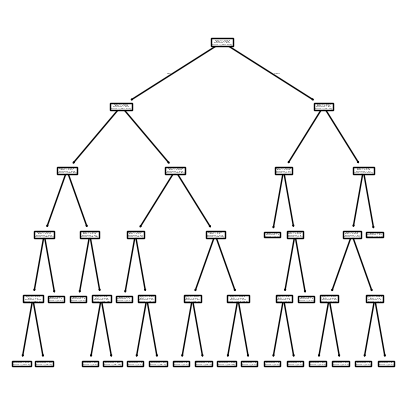

In [32]:
# the ';' will give us info instead of information when plotting in matplotlib
plt.figure(figsize=(5, 5))
plot_tree(dt_model);

Here we create, evaluate the purity of the nodes (gini, entropy, log_los) - just like we did with dt_model (baseline model)

In [33]:
gini_model = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
entropy_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
logloss_model = DecisionTreeClassifier(criterion='log_loss', random_state=42)
logloss_model.fit(X_train, y_train)

,criterion,'log_loss'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
print("GINI Model:\n")
model_evaluator(X_test, y_test, gini_model)

GINI Model:

Accuracy score: 0.670995670995671
Precision score: 0.5208333333333334
Recall score: 0.625
Confusion matrix: 
[[105  46]
 [ 30  50]]
Classification report: 
              precision    recall  f1-score   support

           0       0.78      0.70      0.73       151
           1       0.52      0.62      0.57        80

    accuracy                           0.67       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.67      0.68       231



In [37]:
print("Entropy Model:\n")
model_evaluator(X_test, y_test, entropy_model)

Entropy Model:

Accuracy score: 0.683982683982684
Precision score: 0.5411764705882353
Recall score: 0.575
Confusion matrix: 
[[112  39]
 [ 34  46]]
Classification report: 
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       151
           1       0.54      0.57      0.56        80

    accuracy                           0.68       231
   macro avg       0.65      0.66      0.66       231
weighted avg       0.69      0.68      0.69       231



In [38]:
print("Log Loss Model:\n")
model_evaluator(X_test, y_test, logloss_model)

Log Loss Model:

Accuracy score: 0.683982683982684
Precision score: 0.5411764705882353
Recall score: 0.575
Confusion matrix: 
[[112  39]
 [ 34  46]]
Classification report: 
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       151
           1       0.54      0.57      0.56        80

    accuracy                           0.68       231
   macro avg       0.65      0.66      0.66       231
weighted avg       0.69      0.68      0.69       231



DATAFRAME FOR VISUAL AS IF SHOWING A REPORT TO THE BOSS

In [39]:
from IPython.display import display

def get_metrics(model, X, y):
    preds = model.predict(X)
    return {
        "Accuracy": accuracy_score(y, preds),
        "Precision (Class 1)": precision_score(y, preds),
        "Recall (Class 1)": recall_score(y, preds),
        "F1 Score (Class 1)": f1_score(y, preds),
        "Recall (Class 0)": recall_score(y, preds, pos_label=0),
        "F1 Score (Class 0)": f1_score(y, preds, pos_label=0),
        "Confusion Matrix": confusion_matrix(y, preds)
    }

# Collect metrics into a dataframe
results = pd.DataFrame({
    "Gini": get_metrics(gini_model, X_test, y_test),
    "Entropy": get_metrics(entropy_model, X_test, y_test),
    "Log Loss": get_metrics(logloss_model, X_test, y_test)
})

# Transpose to readable format
results = results.T

# Display
display(results)
print('GINI IS THE PREFERRED IMPURITY FUNCTION BECAUSE OF THE RECALL SCORE - IT MISSES FEWER DIABETIC PATIENTS')

,Accuracy,Precision (Class 1),Recall (Class 1),F1 Score (Class 1),Recall (Class 0),F1 Score (Class 0),Confusion Matrix
Gini,0.670996,0.520833,0.625,0.568182,0.695364,0.734266,"[[105, 46], [30, 50]]"
Entropy,0.683983,0.541176,0.575,0.557576,0.741722,0.754209,"[[112, 39], [34, 46]]"
Log Loss,0.683983,0.541176,0.575,0.557576,0.741722,0.754209,"[[112, 39], [34, 46]]"


GINI IS THE PREFERRED IMPURITY FUNCTION BECAUSE OF THE RECALL SCORE - IT MISSES FEWER DIABETIC PATIENTS


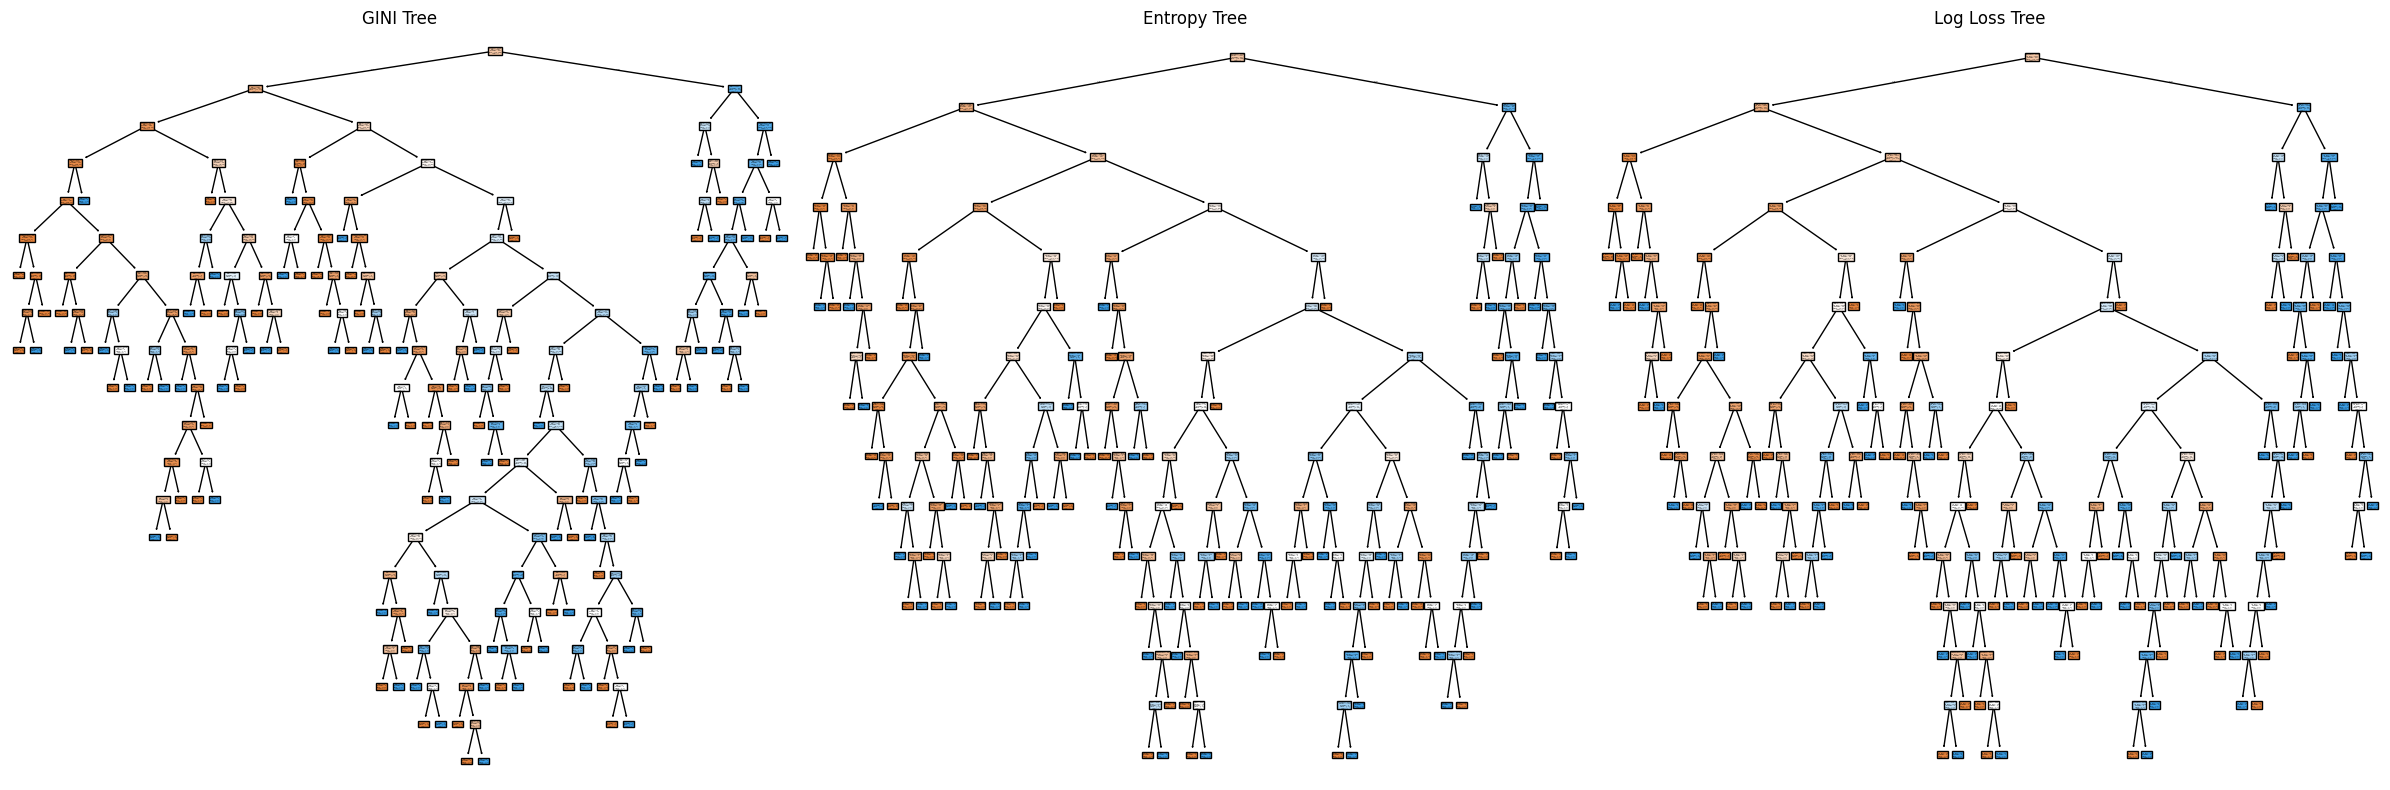

In [40]:
plt.figure(figsize=(24, 8))  

# GINI
plt.subplot(1, 3, 1)  # (rows, columns, position)
plot_tree(gini_model, filled=True, feature_names=include_list, class_names=['0','1'])
plt.title("GINI Tree")

# ENTROPY
plt.subplot(1, 3, 2)
plot_tree(entropy_model, filled=True, feature_names=include_list, class_names=['0','1'])
plt.title("Entropy Tree")

# LOG LOSS
plt.subplot(1, 3, 3)
plot_tree(logloss_model, filled=True, feature_names=include_list, class_names=['0','1'])
plt.title("Log Loss Tree")

plt.tight_layout()
plt.show()

## Step 4: Optimize the previous model

In [41]:
hyperparameters_dict = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 15, 25],
    'min_samples_leaf': [2, 5, 10]
}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
gridsearch_model = GridSearchCV(estimator=DecisionTreeClassifier(),
                                param_grid=hyperparameters_dict,
                                scoring='precision',
                                verbose=3)

In [44]:
gridsearch_model.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.923 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.652 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.792 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.706 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.708 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5;, score=0.923 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5;, score=0.652 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5;, score=0.792 total time=   0.0s
[CV 4/5] END crit

[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=25;, score=0.690 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=25;, score=0.588 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=25;, score=0.647 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2;, score=0.600 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2;, score=0.579 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2;, score=0.562 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2;, score=0.686 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_sa

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [2, 5, ...], 'min_samples_leaf': [2, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'precision'
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [45]:
model_evaluator(X_train, y_train, gridsearch_model)

Accuracy score: 0.7597765363128491
Precision score: 0.8554216867469879
Recall score: 0.3776595744680851
Confusion matrix: 
[[337  12]
 [117  71]]
Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       349
           1       0.86      0.38      0.52       188

    accuracy                           0.76       537
   macro avg       0.80      0.67      0.68       537
weighted avg       0.78      0.76      0.73       537



In [46]:
gridsearch_model.best_estimator_

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [47]:
y_train.value_counts()

Outcome
0    349
1    188
Name: count, dtype: int64

In [48]:
y_train.value_counts(normalize=True)

Outcome
0    0.649907
1    0.350093
Name: proportion, dtype: float64

GridSearchCV automated result got the same as my research, that gini is the better model

In [49]:
gridsearch_model.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [50]:
# percentage of each predicted probabilty 
gridsearch_model.predict_proba(X_test)[:, 1]

array([0.40277778, 0.12605042, 0.12605042, 0.40277778, 0.40277778,
       0.40277778, 0.12605042, 0.40277778, 0.40277778, 0.40277778,
       0.40277778, 0.90140845, 0.40277778, 0.40277778, 0.12605042,
       0.12605042, 0.12605042, 0.12605042, 0.58333333, 0.12605042,
       0.40277778, 0.40277778, 0.40277778, 0.12605042, 0.40277778,
       0.90140845, 0.12605042, 0.12605042, 0.12605042, 0.40277778,
       0.90140845, 0.40277778, 0.90140845, 0.90140845, 0.40277778,
       0.40277778, 0.90140845, 0.40277778, 0.40277778, 0.12605042,
       0.12605042, 0.40277778, 0.40277778, 0.40277778, 0.12605042,
       0.90140845, 0.40277778, 0.12605042, 0.40277778, 0.90140845,
       0.12605042, 0.40277778, 0.40277778, 0.12605042, 0.12605042,
       0.12605042, 0.90140845, 0.12605042, 0.12605042, 0.90140845,
       0.40277778, 0.12605042, 0.40277778, 0.40277778, 0.12605042,
       0.12605042, 0.12605042, 0.40277778, 0.12605042, 0.90140845,
       0.40277778, 0.40277778, 0.40277778, 0.12605042, 0.40277

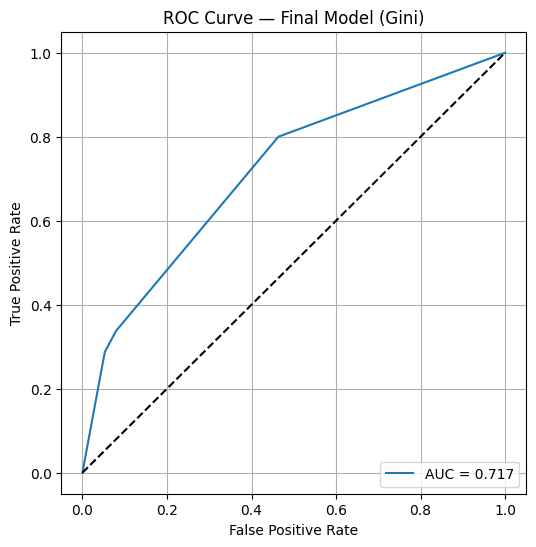

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (diabetes)
y_probs = gridsearch_model.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], "k--")   # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Final Model (Gini)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

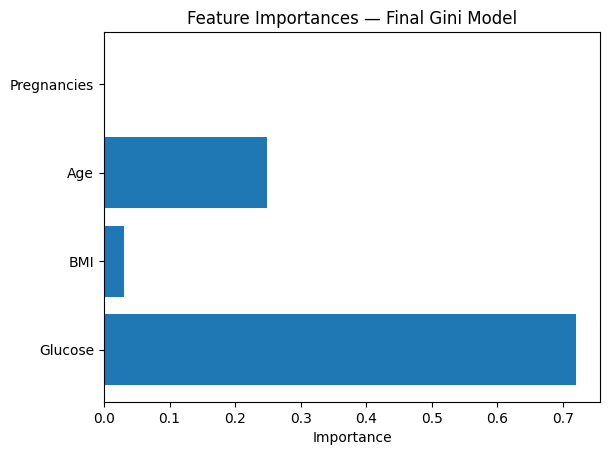

In [52]:
feature_importances = gridsearch_model.best_estimator_.feature_importances_

plt.barh(include_list, feature_importances)
plt.xlabel("Importance")
plt.title("Feature Importances — Final Gini Model")
plt.show()


## EVEN THOUGH PREGNANCIES LOOKS LIKE IT DOESNT MATTER, THE RECALL DROPPED TO 52% FROM THE 62.5% I GET WHEN INCLUDING IT

## STEP 5: SAVE THE MODEL

In [54]:
from pickle import dump

dump(gridsearch_model.best_estimator_, open("decision_tree_classifier_42.sav", "wb"))